In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('winemag-data_first150k.csv')
               
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df.shape

(150930, 11)

In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [6]:
df.describe()

C:\Users\Nihanth\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,NaN
50%,75464.500000,88.000000,NaN
75%,113196.750000,90.000000,NaN
max,150929.000000,100.000000,2300.000000


In [7]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [9]:
# Droping region 2 since it is nulll nearly 10000 times
df.drop(['region_2','Unnamed: 0'], axis=1, inplace=True)


In [25]:
df1=df.copy()
df1=df1.fillna(0)
df1.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [11]:
df3=df1[['points','price']]

In [12]:
df3=df3.groupby(by='points')

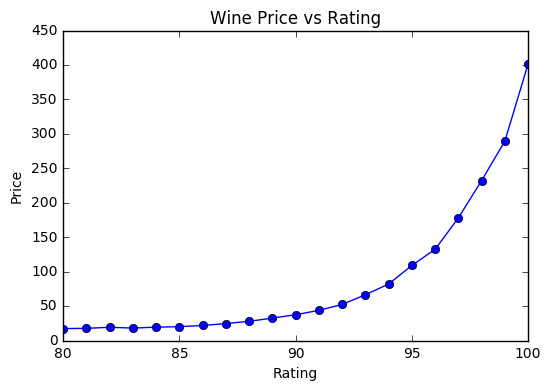

In [13]:
df2=df3.price.mean()

plt.plot(df2, marker='o')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Wine Price vs Rating')

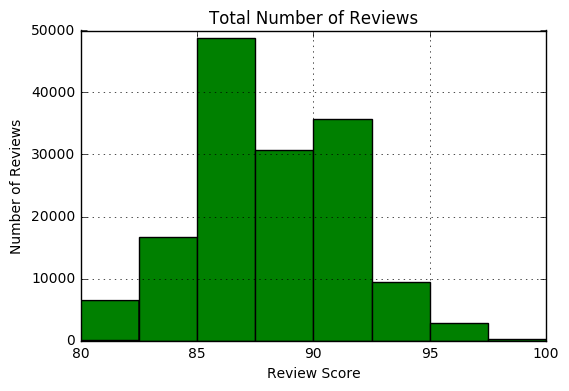

In [14]:
df.hist(column='points', bins = 8, color='g')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews')

In [15]:
#df_filtered = df[df['column'] == value]

# Top 15 costliest wines

cost= df.sort_values('price', ascending=False).reset_index()

cost[['country','price','points','winery','description']].head(15)

,country,price,points,winery,description
0,France,2300.0,99,Château Latour,"A big, powerful wine that sums up the richness..."
1,US,2013.0,91,Blair,The nose on this single-vineyard wine from a s...
2,France,1900.0,98,Château Margaux,"A massive wine for Margaux, packed with tannin..."
3,France,1400.0,100,Krug,A wine that has created its own universe. It h...
4,France,1400.0,100,Krug,A wine that has created its own universe. It h...
5,France,1400.0,100,Krug,A wine that has created its own universe. It h...
6,France,1300.0,96,Château Mouton Rothschild,"The purest Cabernet Sauvignon fruit, with dark..."
7,France,1200.0,96,Château Haut-Brion,"Solid, very structured, packed with dense and ..."
8,France,1100.0,97,Château La Mission Haut-Brion,"Such a generous and ripe wine, with a dark cor..."
9,Austria,1100.0,94,Emmerich Knoll,"Wet earth, rain-wet stones, damp moss, wild sa..."


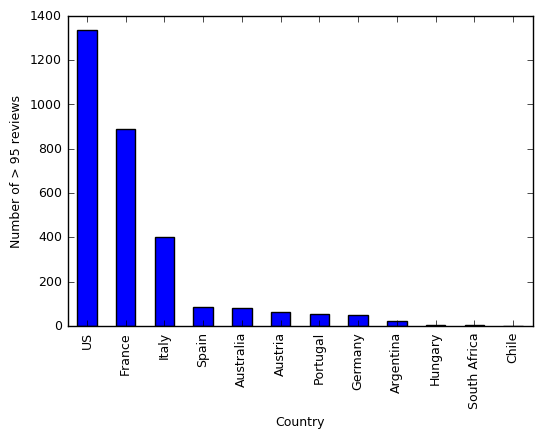

In [152]:
# Best wine producing countries number of >95 reviews
best= df[df['points']>=95]
best1=best['country'].value_counts()
best1.head()
best1.plot(kind='bar')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("Country",fontsize = 9)
plt.ylabel("Number of > 95 reviews", fontsize=9)

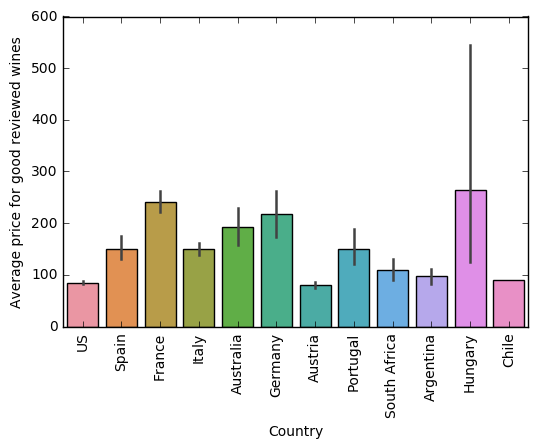

In [150]:
# Average price for good reiew score wines >95
plt1=sns.barplot(x=best['country'],y=best['price'])
plt.xticks(rotation = 90)
plt1.set(xlabel='Country', ylabel='Average price for good reviewed wines')

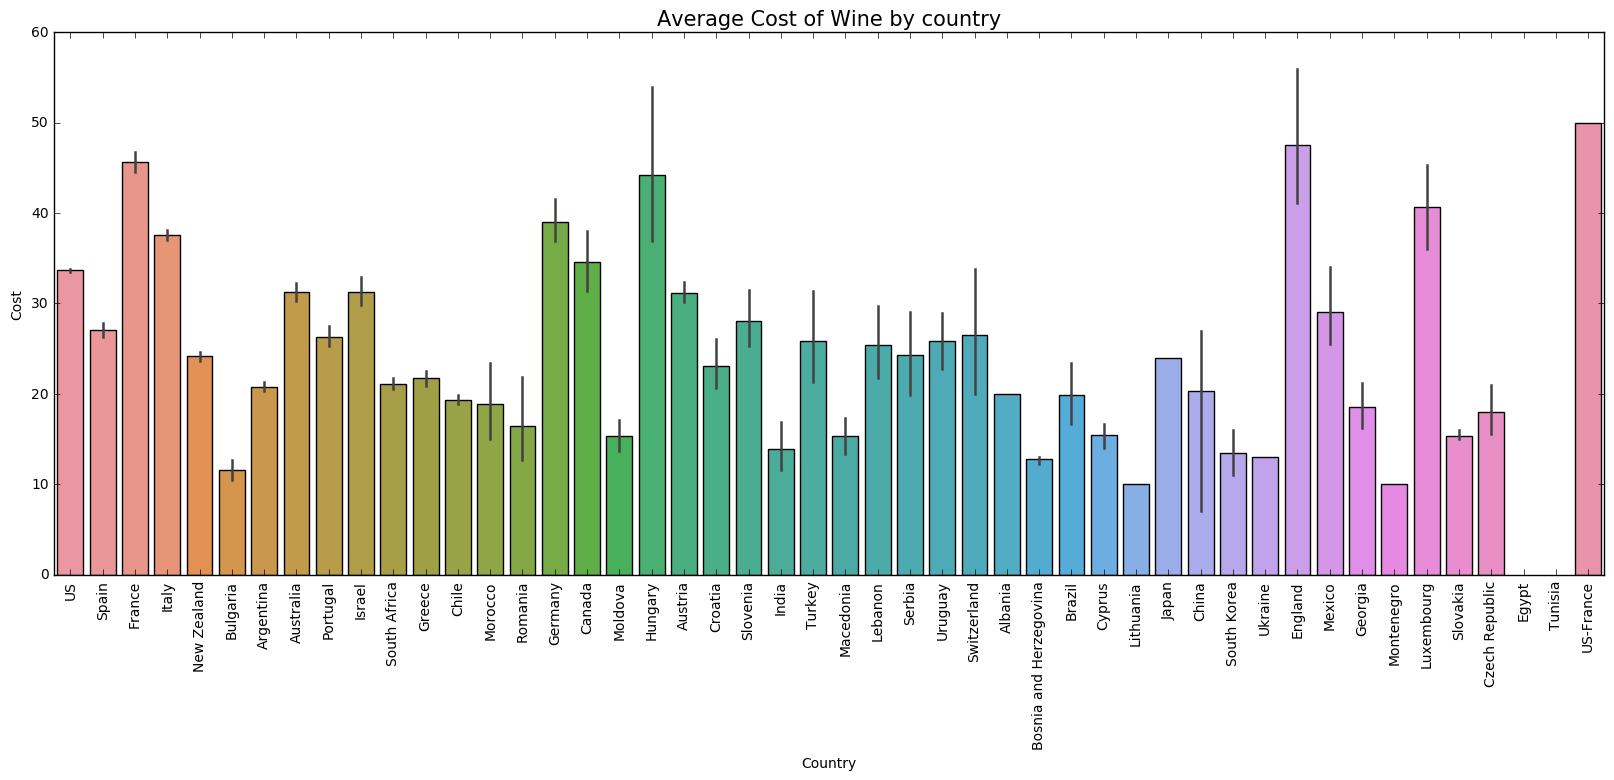

In [151]:
# Average Cost of wine in each country 
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title("Average Cost of Wine by country", fontsize=15)
plt2=sns.barplot(x=df['country'], y=df['price'])
plt2.set(xlabel='Country', ylabel='Cost')

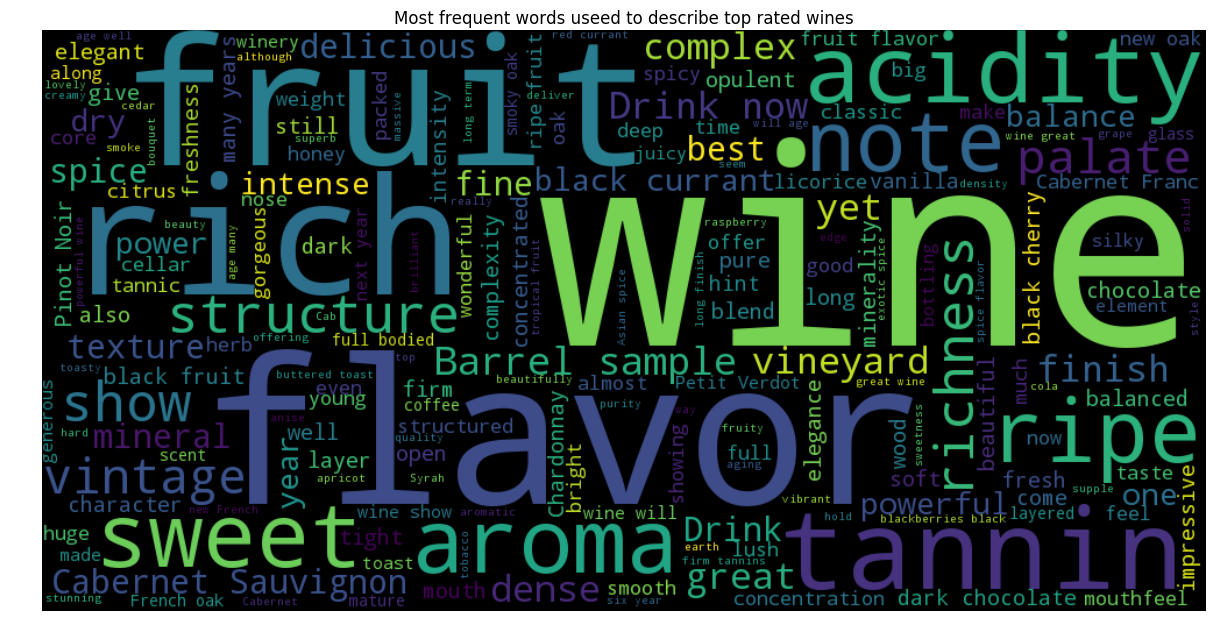

In [153]:
# Most frequent words used in top rated wines
freq=df[df['points']>=95]

wordcloud = WordCloud(width = 1000, height = 500, background_color='black').generate(' '.join(freq['description']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

plt.title('Most frequent words useed to describe top rated wines')

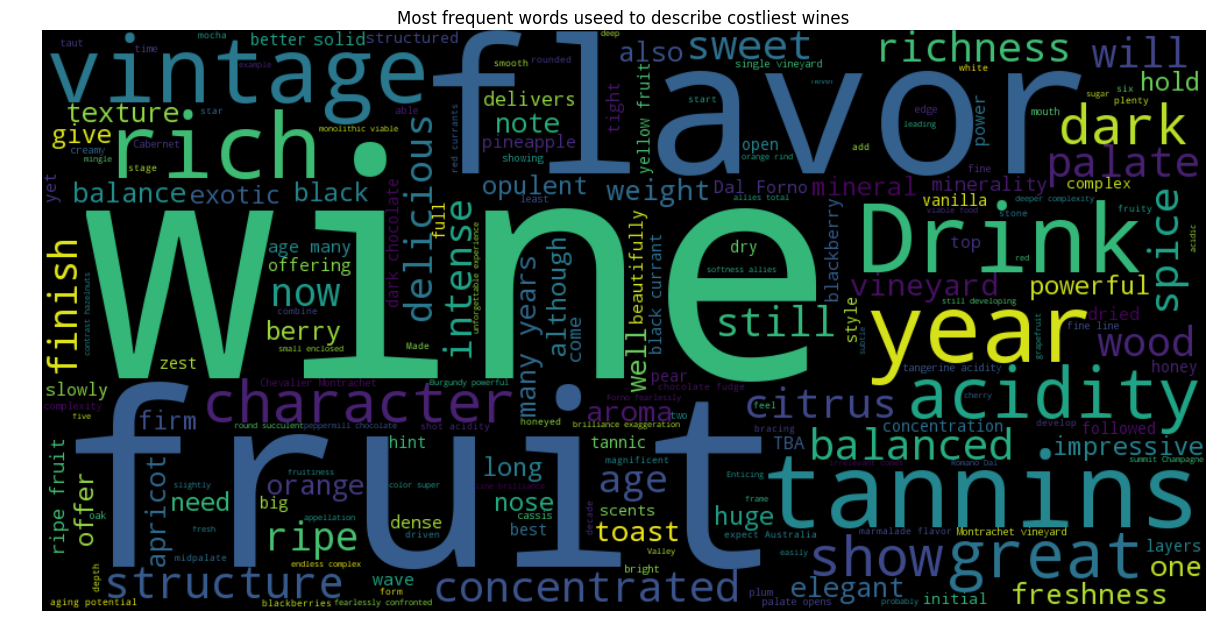

In [154]:
# Most frequent words used in top costliest wines
cost=df[df['price']>=500]

wordcloud = WordCloud(width = 1000, height = 500, background_color='black').generate(' '.join(cost['description']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")
plt.title('Most frequent words useed to describe costliest wines')

(-0.5, 999.5, 499.5, -0.5)

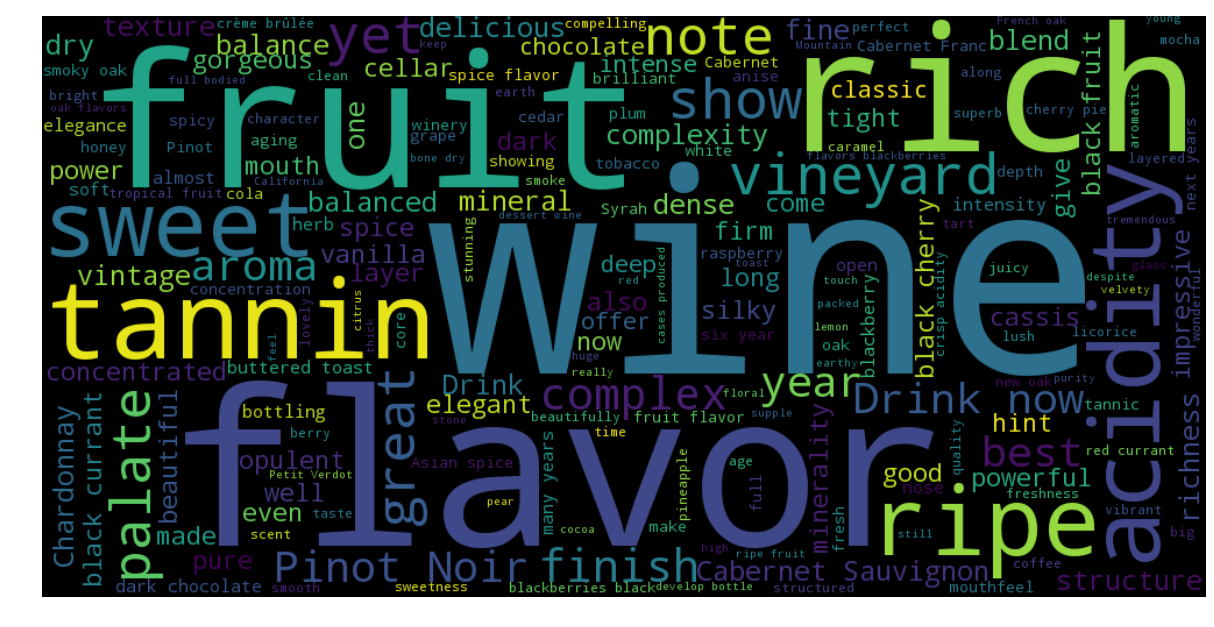

In [59]:
# Most frequent words used in top rated economic wines
eco=df[df['points']>=95]
eco1=eco[eco['price']<100]

wordcloud = WordCloud(width = 1000, height = 500, background_color='black').generate(' '.join(eco1['description']))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)

plt.axis("off")

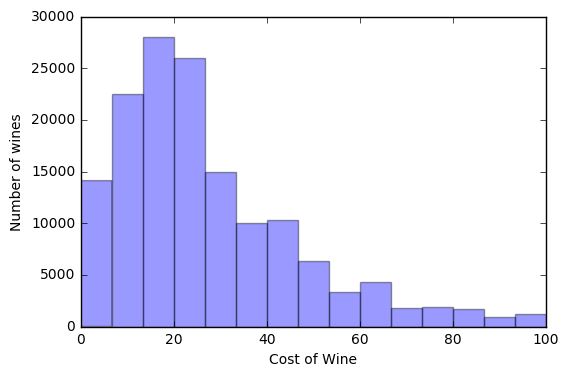

In [164]:
# Number of wines with cost<100
x=df1[df1['price']<=100]
plt3=sns.distplot(x['price'], kde=False, bins=15)
plt3.set(xlabel='Cost of Wine', ylabel='Number of wines')

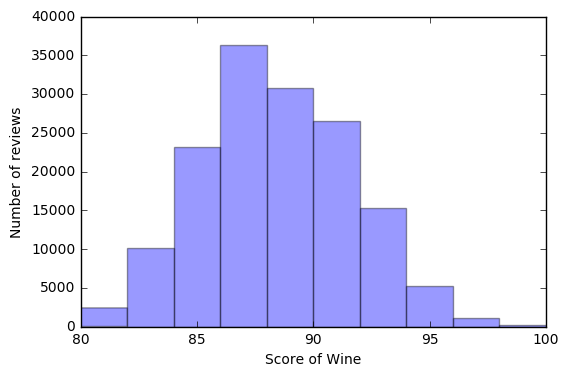

In [156]:
# Number of scores
plt4=sns.distplot(df1['points'], kde=False, bins=10)
plt4.set(xlabel='Score of Wine', ylabel='Number of reviews')

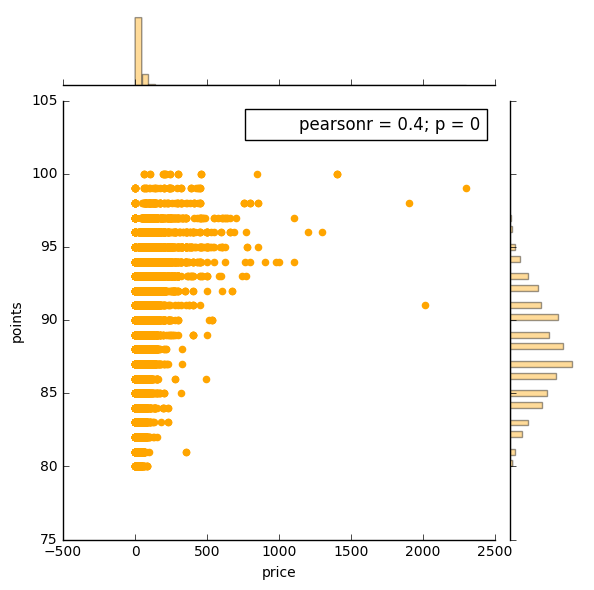

In [52]:
# Wines score vs price. We see that there are very few wines with a price > 1000 in the dataset
sns.jointplot(x=df1['price'],y=df1['points'],color='orange')

In [171]:
# Most wines made by variety
value_counts = df1["variety"].value_counts()
value_counts.head(5)

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

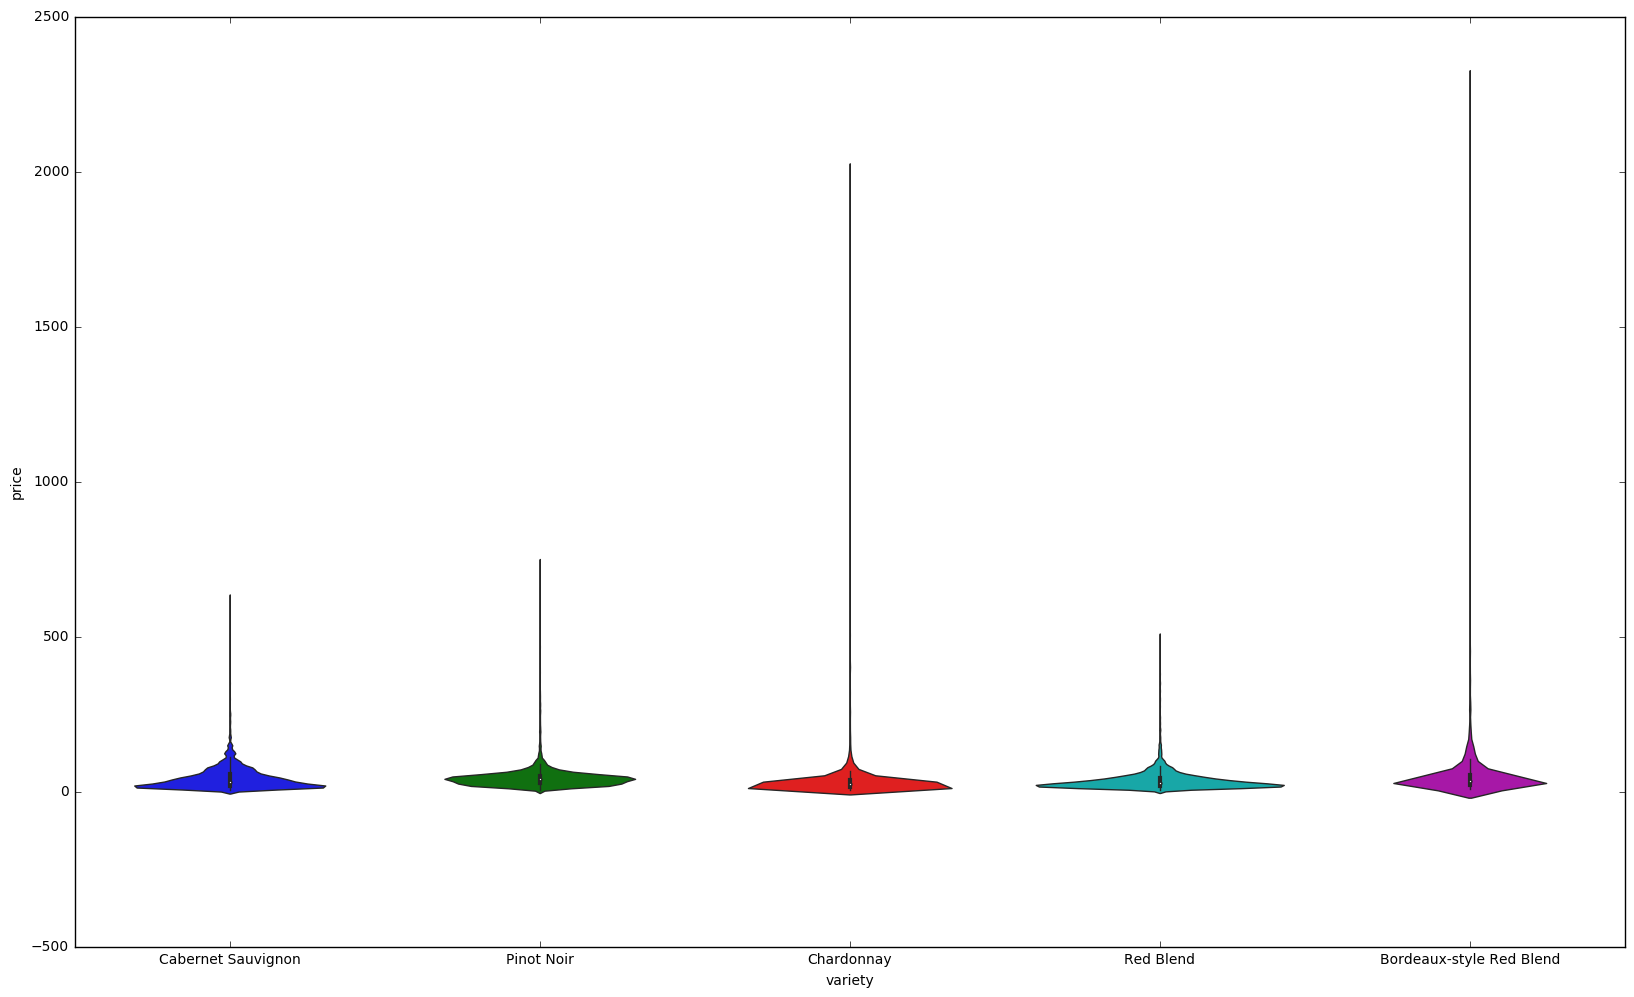

In [182]:
variety=['Chardonnay','Pinot Noir','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend']

variety1 = df[df['variety'].isin(variety)]
plt.figure(figsize=(20,12))
vplot1=sns.violinplot(x='variety',y='price', data=variety1,split=True)

In [170]:
# Most wines made by country
value_counts1 = df1["country"].value_counts()
value_counts1.head(15)

US              62397
Italy           23478
France          21098
Spain            8268
Chile            5816
Argentina        5631
Portugal         5322
Australia        4957
New Zealand      3320
Austria          3057
Germany          2452
South Africa     2258
Greece            884
Israel            630
Hungary           231
Name: country, dtype: int64